In [1]:
from google.colab import files
  
  
uploaded = files.upload()

Saving train (1).csv to train (1).csv


In [2]:
from google.colab import files
  
  
uploaded = files.upload()

Saving test (1).csv to test (1).csv


In [3]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from scipy.stats import skew,norm
from sklearn.preprocessing import scale

**Data Exploration**

In [5]:
# This code for see all column and Row

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
test_df = pd.read_csv("test (1).csv")
test_df.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  69999        109             0.0             0.0             0.0   
1  70000        109             0.0             0.0             0.0   
2  70001        109             0.0             0.0             0.0   
3  70002        109             0.0             0.0             0.0   
4  70003        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   91.882   
1            6/30/2014            7/31/2014            8/31/2014  414.168   
2            6/30/2014            7/31/2014            8/31/2014  329.844   
3            6/30/2014            7/31/2014            8/31/2014   43.550   
4            6/30/2014            7/31/2014            8/31/2014  306.854   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   65.330   64.445        31.78        20.23        23.11         60.16   
1  515.568  360.868        75.51        41.21        19.84        474.34   
2  434.884  746.239         7.54         7.86         8.40         16.98   
3  171.390   24.400         5.31         2.16         0.00         40.04   
4  406.289  413.329       450.93       609.03       700.68         60.94   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         32.16         34.83           0.00           0.00           0.00   
1        621.84        394.94           0.00           0.00           0.00   
2         45.81         45.04          22.81         103.38          26.08   
3        205.01         24.01           0.00           0.00           0.00   
4         23.84         74.16           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00           0.00           0.00             24.88   
1           0.00           0.00           0.00             75.51   
2          24.53          53.68          54.44              0.00   
3           0.00           0.00           0.00              5.31   
4           0.00           0.00           0.00              0.45   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0             20.23             21.06             18.13             10.89   
1             41.21             19.84            473.61            598.08   
2              0.00              0.00              0.00              0.00   
3              0.00              0.00              2.94             98.61   
4              0.78             14.56              2.39              2.66   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              8.36              0.00             13.58              0.00   
1            377.26              0.73              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             20.51              0.00              0.00              2.35   
4             10.94              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.0              0.00              0.03         43.01   
1               0.0              0.00              0.00        549.86   
2               0.0              0.00              0.00          0.00   
3               0.0              6.18              0.00          8.26   
4               0.0              0.00              0.00          2.84   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         44.71         29.43              6.90              0.00   
1        639.29        397.11              0.00              0.00   
2          0.00          0.00              0.00              0.00   
3         98.61         22.86              0.00              2.16   
4          3.44         25.51            450.48            608.24   

 

In [7]:
test_df.shape

(30000, 171)

In [8]:
train_df = pd.read_csv("train (1).csv")
train_df.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   87.009    7.527        48.58       124.38         1.29         32.24   
1  122.787   42.953         0.00         0.00         0.00          0.00   
2  103.176    0.000         0.53        15.93         0.00         53.99   
3  205.260  111.095         7.26        16.01         0.00         68.76   
4  128.191  101.565        21.28         4.83         6.13         56.99   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         96.68          2.33           0.00            0.0            0.0   
1         25.99         30.89           0.00            0.0            0.0   
2         82.05          0.00           0.00            0.0            0.0   
3         78.48         50.23           0.00            0.0            0.0   
4         38.11          9.63          53.64            0.0            0.0   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00            0.0           0.00              2.23   
1           0.00            0.0           0.00              0.00   
2           0.00            0.0           0.00              0.53   
3           0.00            0.0           1.63              6.99   
4          15.73            0.0           0.00             10.16   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.28              5.29             16.04   
1              0.00              0.00              0.00              0.00   
2             12.98              0.00             24.11              0.00   
3              3.94              0.00             37.91             44.89   
4              4.83              6.13             36.74             19.88   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              2.33              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             23.63              0.00              0.00              0.00   
4              4.61             11.99              1.23              5.01   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0              0.00              0.00              0.00          7.53   
1              0.00             22.01             29.79          0.00   
2              2.14              0.00              0.00         24.64   
3              0.00              0.00              8.03         44.91   
4              0.00              9.85              0.00         58.91   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         16.04          2.61             46.34            124.38   
1          0.00          0.00              0.00              0.00   
2         12.98          0.00              0.00              2.94   
3         48.84         23.63              0.26             12.06   
4         25.94         15.76              0.00              0.00   

   std_og_t2t_mo

In [9]:
train_df.shape

(69999, 172)

In [10]:
# Check datatype

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [11]:
train_df.describe()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  69999.000000    69999.0         69297.0         69297.0   
mean   34999.000000      109.0             0.0             0.0   
std    20207.115084        0.0             0.0             0.0   
min        0.000000      109.0             0.0             0.0   
25%    17499.500000      109.0             0.0             0.0   
50%    34999.000000      109.0             0.0             0.0   
75%    52498.500000      109.0             0.0             0.0   
max    69998.000000      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         69297.0  69999.000000  69999.000000  69999.000000  67231.000000   
mean              0.0    283.134365    278.185912    278.858826    133.153275   
std               0.0    334.213918    344.366927    351.924315    299.963093   
min               0.0  -2258.709000  -1289.715000   -945.808000      0.000000   
25%               0.0     93.581000     86.714000     84.095000      7.410000   
50%               0.0    197.484000    191.588000    192.234000     34.110000   
75%               0.0    370.791000    365.369500    369.909000    119.390000   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  67312.000000  66296.000000  67231.000000  67312.000000  66296.000000   
mean     133.894438    132.978257    198.874771    197.153383    196.543577   
std      311.277193    311.896596    316.818355    322.482226    324.089234   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.675000      6.410000     34.860000     32.240000     31.575000   
50%       32.280000     32.100000     96.480000     91.885000     91.800000   
75%      115.837500    115.060000    232.990000    227.630000    229.345000   
max     8157.780000  10752.560000   8362.360000   7043.980000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   67231.000000   67312.000000   66296.000000   67231.000000   
mean        9.765435       7.014568       7.004892      14.186457   
std        57.374429      55.960985      53.408135      73.469261   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      2850.980000    4155.830000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   67312.000000   66296.000000      67231.000000      67312.000000   
mean        9.842191       9.771783         46.904854         46.166503   
std        58.511894      64.618388        150.971758        154.739002   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.650000   
50%         0.000000       0.000000         11.910000         11.580000   
75%         0.000000       0.000000         40.740000         39.760000   
max      2812.040000    5337.040000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      66296.000000      67231.000000      67312.000000      66296.000000   
mean          45.686109         93.238231         90.799240         91.121447   
std          153.716880        162.046699        153.852597        152.997805   
min            0.000000          0.000000          0.000000          0.000000   
25%            1.610000          9.920000         10.090000          9.830000   
50%           11.740000         41.030000         40.170000         40.350000   
75%           39.895000        110.430000        107.540000        109.245000   
max        10752.560000       4696

In [12]:
# Checking for percentage null value
null_column_value = train_df.isnull().sum()/train_df.shape[0]*100
null_column_value

id                           0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.002871
std_og_t2o_mou               1.002871
loc_ic_t2o_mou               1.002871
last_date_of_month_6         0.000000
last_date_of_month_7         0.570008
last_date_of_month_8         1.047158
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  3.954342
onnet_mou_7                  3.838626
onnet_mou_8                  5.290076
offnet_mou_6                 3.954342
offnet_mou_7                 3.838626
offnet_mou_8                 5.290076
roam_ic_mou_6                3.954342
roam_ic_mou_7                3.838626
roam_ic_mou_8                5.290076
roam_og_mou_6                3.954342
roam_og_mou_7                3.838626
roam_og_mou_8                5.290076
loc_og_t2t_mou_6             3.954342
loc_og_t2t_mou_7             3.838626
loc_og_t2t_mou_8             5.290076
loc_og_t2m_m

In [13]:
# here we find a colum which is contain 70 percentaze null value
max_null_column_list = null_column_value.loc[null_column_value >70]
max_null_column_list

date_of_last_rech_data_6    74.902499
date_of_last_rech_data_7    74.478207
date_of_last_rech_data_8    73.689624
total_rech_data_6           74.902499
total_rech_data_7           74.478207
total_rech_data_8           73.689624
max_rech_data_6             74.902499
max_rech_data_7             74.478207
max_rech_data_8             73.689624
count_rech_2g_6             74.902499
count_rech_2g_7             74.478207
count_rech_2g_8             73.689624
count_rech_3g_6             74.902499
count_rech_3g_7             74.478207
count_rech_3g_8             73.689624
av_rech_amt_data_6          74.902499
av_rech_amt_data_7          74.478207
av_rech_amt_data_8          73.689624
arpu_3g_6                   74.902499
arpu_3g_7                   74.478207
arpu_3g_8                   73.689624
arpu_2g_6                   74.902499
arpu_2g_7                   74.478207
arpu_2g_8                   73.689624
night_pck_user_6            74.902499
night_pck_user_7            74.478207
night_pck_us

In [14]:
max_null_column_array = max_null_column_list.keys()
max_null_column_array

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8'],
      dtype='object')

In [15]:
#Print only int64 values
int_column = train_df.select_dtypes(include="int64")
int_column.keys()

Index(['id', 'circle_id', 'total_rech_num_6', 'total_rech_num_7',
       'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7',
       'last_day_rch_amt_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
       'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6',
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'churn_probability'],
      dtype='object')

In [16]:
#checking int64 value 
def common(a,b): 
    c = [value for value in a if value in b] 
    return c

new_list=common(max_null_column_array,int_column)
print(new_list)

[]


In [17]:
#Print only float64 values
float_column = train_df.select_dtypes(include="float64")
float_column.keys()

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6',
       ...
       'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'fb_user_6', 'fb_user_7', 'fb_user_8', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g'],
      dtype='object', length=135)

In [18]:
def common(a,b): 
    c = [value for value in a if value in b] 
    return c

new_list_column=common(max_null_column_array,float_column)
print(new_list_column)

['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']


In [19]:
#print without int and float value
print(list(set(max_null_column_array) - set(new_list_column)))

['date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_6']


In [20]:
print(new_list_column)

['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']


In [21]:
# There are several columns having missing values and it is meaningful to impute them with zero such as recharge

train_df[new_list_column] = train_df[new_list_column].fillna(0)

In [22]:
train_df.head(12)

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0    0        109             0.0             0.0             0.0   
1    1        109             0.0             0.0             0.0   
2    2        109             0.0             0.0             0.0   
3    3        109             0.0             0.0             0.0   
4    4        109             0.0             0.0             0.0   
5    5        109             0.0             0.0             0.0   
6    6        109             0.0             0.0             0.0   
7    7        109             0.0             0.0             0.0   
8    8        109             0.0             0.0             0.0   
9    9        109             0.0             0.0             0.0   
10  10        109             0.0             0.0             0.0   
11  11        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0             6/30/2014            7/31/2014            8/31/2014   31.277   
1             6/30/2014            7/31/2014            8/31/2014    0.000   
2             6/30/2014            7/31/2014            8/31/2014   60.806   
3             6/30/2014            7/31/2014            8/31/2014  156.362   
4             6/30/2014            7/31/2014            8/31/2014  240.708   
5             6/30/2014            7/31/2014            8/31/2014   86.193   
6             6/30/2014            7/31/2014            8/31/2014   54.173   
7             6/30/2014            7/31/2014            8/31/2014  167.861   
8             6/30/2014            7/31/2014            8/31/2014  163.550   
9             6/30/2014            7/31/2014            8/31/2014  101.984   
10            6/30/2014            7/31/2014            8/31/2014  445.826   
11            6/30/2014            7/31/2014            8/31/2014  292.724   

     arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0    87.009    7.527        48.58       124.38         1.29         32.24   
1   122.787   42.953         0.00         0.00         0.00          0.00   
2   103.176    0.000         0.53        15.93         0.00         53.99   
3   205.260  111.095         7.26        16.01         0.00         68.76   
4   128.191  101.565        21.28         4.83         6.13         56.99   
5    83.351   88.462         1.39         1.78         0.45         17.14   
6    95.130    6.386        38.81        40.56        19.61         31.63   
7   167.869  167.866         0.00         0.00         0.00          0.00   
8    90.250   51.726         0.00         0.00         0.00         47.81   
9   259.265   65.686        27.49       111.78        53.38        110.51   
10   18.310   24.690        16.54         0.00         0.00        104.81   
11  228.753  418.233       135.54        63.61       177.36         46.39   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          96.68          2.33           0.00           0.00           0.00   
1          25.99         30.89           0.00           0.00           0.00   
2          82.05          0.00           0.00           0.00           0.00   
3          78.48         50.23           0.00           0.00           0.00   
4          38.11          9.63          53.64           0.00           0.00   
5          24.26          3.44           0.00           0.00           0.00   
6          54.18          5.69           0.00           0.00           0.00   
7           0.00          0.00           0.00           0.00           0.00   
8          50.88         21.74          28.26          11.31          47.81   
9         124.04         85.54           0.00           7.23           0.00   
10          8.16          2.36          18.56           0.00           0.00   
11         65.48         92.81           0.00           0.00           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_m

**Removing columns with Zero variance or a single value**

In [23]:
## There are cols with blank and zeroes as well 

print("Cols with Zero variance : ")
zero_var_cols = []
for col in train_df.columns:
    if (len(train_df[col].unique()) <= 2 ):
        print(col)
        zero_var_cols.append(col)

Cols with Zero variance : 
circle_id
loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
last_date_of_month_6
last_date_of_month_7
last_date_of_month_8
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_ic_t2o_mou_6
std_ic_t2o_mou_7
std_ic_t2o_mou_8
night_pck_user_6
night_pck_user_7
night_pck_user_8
fb_user_6
fb_user_7
fb_user_8
churn_probability


In [24]:
## Lets remove the above columns as they do not add any value to the analysis
## Also deleting the mobile_number column which doesnot make sense to analyse or use for prediction. Also that it is unique for each customer

train_df.drop(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 
                 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6',
                 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 
                 'std_ic_t2o_mou_8'], axis=1, inplace=True)

In [25]:
train_df.shape

(69999, 159)

In [26]:
dfCopy = train_df.copy()

In [27]:
dfCopy.shape

(69999, 159)

In [28]:
### Finding the High value customers according to the business definition provided

## We will consider the recharge amount for june and july ad consider the top 70% customers as high value ones

dfCopy['AVG_amt_6_7'] = dfCopy[['total_rech_amt_6', 'total_rech_amt_7']].mean(axis = 1)
dfCopy.head()

id   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   0   31.277   87.009    7.527        48.58       124.38         1.29   
1   1    0.000  122.787   42.953         0.00         0.00         0.00   
2   2   60.806  103.176    0.000         0.53        15.93         0.00   
3   3  156.362  205.260  111.095         7.26        16.01         0.00   
4   4  240.708  128.191  101.565        21.28         4.83         6.13   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0         32.24         96.68          2.33           0.00            0.0   
1          0.00         25.99         30.89           0.00            0.0   
2         53.99         82.05          0.00           0.00            0.0   
3         68.76         78.48         50.23           0.00            0.0   
4         56.99         38.11          9.63          53.64            0.0   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.0           0.00            0.0           0.00   
1            0.0           0.00            0.0           0.00   
2            0.0           0.00            0.0           0.00   
3            0.0           0.00            0.0           1.63   
4            0.0          15.73            0.0           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              2.23              0.00              0.28              5.29   
1              0.00              0.00              0.00              0.00   
2              0.53             12.98              0.00             24.11   
3              6.99              3.94              0.00             37.91   
4             10.16              4.83              6.13             36.74   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0             16.04              2.33              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             44.89             23.63              0.00              0.00   
4             19.88              4.61             11.99              1.23   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00              0.00              0.00              0.00   
1              0.00              0.00             22.01             29.79   
2              0.00              2.14              0.00              0.00   
3              0.00              0.00              0.00              8.03   
4              5.01              0.00              9.85              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0          7.53         16.04          2.61             46.34   
1          0.00          0.00          0.00              0.00   
2         24.64         12.98          0.00              0.00   
3         44.91         48.84         23.63              0.26   
4         58.91         25.94         15.76              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0            124.38              1.01             18.75             80.61   
1              0.00              0.00              0.00              0.00   
2              2.94              0.00             28.94             82.05   
3             12.06              0.00             15.33             25.93   
4              0.00              0.00              4.35              0.00   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.0              0.00               0.0               0.0   
1               0.0              0.00               0.0               0.0   
2               0.0              0.00               0.0               0.0   
3               4.6              0.56               0.0               0.0   
4               0.0              0.00               0.0               

In [29]:
hv_curn = dfCopy[(dfCopy['AVG_amt_6_7'] > dfCopy['AVG_amt_6_7'].quantile(0.7))]

In [30]:
hv_curn.drop(['AVG_amt_6_7'], axis = 1, inplace = True)
print(hv_curn.shape)

(20951, 159)


In [31]:
date_colmn = ['date_of_last_rech_6','date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7','date_of_last_rech_data_8']

hv_curn[date_colmn] = hv_curn[date_colmn].apply(pd.to_datetime, errors = 'ignore')  

In [32]:
hv_curn[date_colmn].head()

date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  \
12          2014-06-29          2014-07-30          2014-08-30   
15          2014-06-27          2014-07-25          2014-08-30   
23          2014-06-30          2014-07-31          2014-08-22   
24          2014-06-24          2014-07-25          2014-08-30   
25          2014-06-22          2014-07-29          2014-08-30   

   date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8  
12                      NaT                      NaT                      NaT  
15               2014-06-16                      NaT               2014-08-02  
23                      NaT                      NaT                      NaT  
24               2014-06-19               2014-07-25               2014-08-08  
25                      NaT                      NaT                      NaT

In [33]:
hv_curn[date_colmn].isna().sum(axis =0 )

date_of_last_rech_6            42
date_of_last_rech_7            82
date_of_last_rech_8           412
date_of_last_rech_data_6    13067
date_of_last_rech_data_7    12863
date_of_last_rech_data_8    12805
dtype: int64

In [34]:
# Removing the columns with more than 50% of missing values

hv_curn.drop(['date_of_last_rech_data_6', 'date_of_last_rech_data_7','date_of_last_rech_data_8'], axis = 1, inplace = True)
date_colmn = ['date_of_last_rech_6','date_of_last_rech_7',
 'date_of_last_rech_8']

hv_curn[date_colmn].head()

date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8
12          2014-06-29          2014-07-30          2014-08-30
15          2014-06-27          2014-07-25          2014-08-30
23          2014-06-30          2014-07-31          2014-08-22
24          2014-06-24          2014-07-25          2014-08-30
25          2014-06-22          2014-07-29          2014-08-30

**Dropping date columns**


*   Though they could be used to get the no of days since last recharge



In [35]:
hv_curn.drop(date_colmn, axis = 1, inplace = True)
hv_curn.shape

(20951, 153)

#**Defining churn and tagging them in data frame**
**Attributes used to tag churners are**
*  total_ic_mou_9
*  total_og_mou_9
*  vol_2g_mb_9
*  vol_3g_mb_9

In [36]:
# Churn condition

churn_cond = ((hv_curn['total_ic_mou_8'] == 0) | (hv_curn['total_og_mou_8'] == 0))   \
         & ((hv_curn['vol_2g_mb_8'] == 0) | (hv_curn['vol_3g_mb_8'] == 0))

# creating churn variable.    1 implies churn and 0 as no churn
hv_curn['churn'] = np.where(churn_cond,1,0)

In [37]:
hv_curn['churn'] = hv_curn['churn'].astype('object')

In [38]:
print("Churn Ratio : ")
print(hv_curn.churn.value_counts()*100/hv_curn.shape[0])

Churn Ratio : 
0    93.188869
1     6.811131
Name: churn, dtype: float64


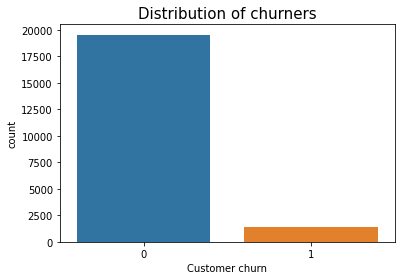

In [39]:
sns.countplot(x = hv_curn.churn)
plt.xlabel("Customer churn", fontsize = 10)
plt.ylabel('count', fontsize = 10)
plt.title("Distribution of churners", fontsize = 15)
plt.show() 

In [40]:
## Dropping all columns of churn phase

hv_curn.drop(columns = [col for col in hv_curn.columns if '_8' in col], axis = 1, inplace = True)

print("DataFrame shape : " , hv_curn.shape)

DataFrame shape :  (20951, 105)


In [41]:
churn_data = hv_curn.copy()
churn_data.reset_index(inplace = True)
churn_data.drop(['index'], axis = 1, inplace = True)
churn_data.shape

(20951, 105)

#**Missing Values**
**We are left with numerical features**

In [42]:
# Checking for percentage null value
null_column_value = churn_data.isnull().sum()/churn_data.shape[0]*100
null_column_value

id                    0.000000
arpu_6                0.000000
arpu_7                0.000000
onnet_mou_6           1.059615
onnet_mou_7           0.988020
offnet_mou_6          1.059615
offnet_mou_7          0.988020
roam_ic_mou_6         1.059615
roam_ic_mou_7         0.988020
roam_og_mou_6         1.059615
roam_og_mou_7         0.988020
loc_og_t2t_mou_6      1.059615
loc_og_t2t_mou_7      0.988020
loc_og_t2m_mou_6      1.059615
loc_og_t2m_mou_7      0.988020
loc_og_t2f_mou_6      1.059615
loc_og_t2f_mou_7      0.988020
loc_og_t2c_mou_6      1.059615
loc_og_t2c_mou_7      0.988020
loc_og_mou_6          1.059615
loc_og_mou_7          0.988020
std_og_t2t_mou_6      1.059615
std_og_t2t_mou_7      0.988020
std_og_t2m_mou_6      1.059615
std_og_t2m_mou_7      0.988020
std_og_t2f_mou_6      1.059615
std_og_t2f_mou_7      0.988020
std_og_mou_6          1.059615
std_og_mou_7          0.988020
isd_og_mou_6          1.059615
isd_og_mou_7          0.988020
spl_og_mou_6          1.059615
spl_og_m

In [43]:
mv1 = round(100*(churn_data.isna().sum(axis=0)/churn_data.shape[0]), 2)
s=mv1.loc[mv1>0]
impute_cols_num = list(s.index)
print( "Length of cols having misSing values : ", len(impute_cols_num))

Length of cols having misSing values :  54


In [44]:
s

onnet_mou_6         1.06
onnet_mou_7         0.99
offnet_mou_6        1.06
offnet_mou_7        0.99
roam_ic_mou_6       1.06
roam_ic_mou_7       0.99
roam_og_mou_6       1.06
roam_og_mou_7       0.99
loc_og_t2t_mou_6    1.06
loc_og_t2t_mou_7    0.99
loc_og_t2m_mou_6    1.06
loc_og_t2m_mou_7    0.99
loc_og_t2f_mou_6    1.06
loc_og_t2f_mou_7    0.99
loc_og_t2c_mou_6    1.06
loc_og_t2c_mou_7    0.99
loc_og_mou_6        1.06
loc_og_mou_7        0.99
std_og_t2t_mou_6    1.06
std_og_t2t_mou_7    0.99
std_og_t2m_mou_6    1.06
std_og_t2m_mou_7    0.99
std_og_t2f_mou_6    1.06
std_og_t2f_mou_7    0.99
std_og_mou_6        1.06
std_og_mou_7        0.99
isd_og_mou_6        1.06
isd_og_mou_7        0.99
spl_og_mou_6        1.06
spl_og_mou_7        0.99
og_others_6         1.06
og_others_7         0.99
loc_ic_t2t_mou_6    1.06
loc_ic_t2t_mou_7    0.99
loc_ic_t2m_mou_6    1.06
loc_ic_t2m_mou_7    0.99
loc_ic_t2f_mou_6    1.06
loc_ic_t2f_mou_7    0.99
loc_ic_mou_6        1.06
loc_ic_mou_7        0.99


In [45]:
temp = churn_data.dropna()
print(churn_data.shape[0]-temp.shape[0])

336


**Although the number of rows being deleted if missing columns dropped are around 336, it could be a loss of valuable info. So let's use KNN imputer to impute these missng values**

In [46]:
from sklearn.impute import KNNImputer

impute = KNNImputer(n_neighbors=5)

In [47]:
churn_data_num = churn_data[impute_cols_num]
churn_df = churn_data.drop(impute_cols_num, axis = 1)

In [48]:
import time
# To impute the missing values using KNNImpute
start = time.time()
churn_data_impute = impute.fit_transform(churn_data_num)
end = time.time()
print("Time taken to impute missing values in seconds :",end-start)

Time taken to impute missing values in seconds : 8.561279296875


In [49]:
churn_data_impute = pd.DataFrame(churn_data_impute, columns= impute_cols_num)
churn_data_impute.head()

onnet_mou_6  onnet_mou_7  offnet_mou_6  offnet_mou_7  roam_ic_mou_6  \
0       244.46       108.31        571.98        727.91            0.0   
1        10.43        24.99        317.11        341.79            0.0   
2       859.53       372.71        293.46        450.11            0.0   
3        93.18        38.29        531.19        507.76            0.0   
4       193.71       124.53        423.21        184.88            0.0   

   roam_ic_mou_7  roam_og_mou_6  roam_og_mou_7  loc_og_t2t_mou_6  \
0            0.0            0.0            0.0              0.00   
1            0.0            0.0            0.0             10.43   
2            0.0            0.0            0.0            859.53   
3            0.0            0.0            0.0             93.18   
4            0.0            0.0            0.0             49.81   

   loc_og_t2t_mou_7  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2f_mou_6  \
0              7.86             44.01             13.93              0.00   
1             24.99            313.76            330.88              3.26   
2            372.71             79.79            424.63             11.58   
3             38.29            159.29            219.44              0.00   
4             75.01            164.39            115.48              3.31   

   loc_og_t2f_mou_7  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_mou_6  \
0              0.00               0.0               0.0         44.01   
1             10.91               0.0               0.0        327.46   
2             25.43               0.0               0.0        950.91   
3              0.00               0.0               0.0        252.48   
4              0.00               0.0               0.0        217.53   

   loc_og_mou_7  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2m_mou_6  \
0         21.79            244.46            100.44            527.96   
1        366.79              0.00              0.00              0.00   
2        822.78              0.00              0.00            202.08   
3        257.74              0.00              0.00            371.89   
4        190.49            143.89             49.51            255.49   

   std_og_t2m_mou_7  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_mou_6  \
0            713.98               0.0               0.0        772.43   
1              0.00               0.0               0.0          0.00   
2              0.00               0.0               0.0        202.08   
3            288.31               0.0               0.0        371.89   
4             64.99               0.0               0.0        399.39   

   std_og_mou_7  isd_og_mou_6  isd_og_mou_7  spl_og_mou_6  spl_og_mou_7  \
0        814.43           0.0           0.0          0.00          0.00   
1          0.00           0.0           0.0          0.08          0.00   
2          0.00           0.0           0.0          0.00          0.05   
3        288.31           0.0           0.0          0.00          0.00   
4        114.51           0.0           0.0          0.00          4.40   

   og_others_6  og_others_7  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  \
0          0.0          0.0              0.00              0.53   
1          0.1          0.0             13.86             20.18   
2          0.0          0.0            233.28            117.63   
3          0.0          0.0             52.49             37.84   
4          0.0          0.0            113.76            114.98   

   loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  \
0             26.93             25.68              0.00              0.00   
1            219.31            754.24              0.00              1.93   
2            123.78            278.49             34.31             52.08   
3            170.61            106.71              0.00              1.53   
4            230.24            180.11             26.71              2.01   

   loc_ic_mou_6  loc_ic_mou_7  std_ic_t2t_mou_6  std

In [50]:
churn_master = pd.concat([churn_data_impute, churn_df], axis = 1, join = 'inner')
print(churn_master.shape)
churn_master.head()

(20951, 105)


onnet_mou_6  onnet_mou_7  offnet_mou_6  offnet_mou_7  roam_ic_mou_6  \
0       244.46       108.31        571.98        727.91            0.0   
1        10.43        24.99        317.11        341.79            0.0   
2       859.53       372.71        293.46        450.11            0.0   
3        93.18        38.29        531.19        507.76            0.0   
4       193.71       124.53        423.21        184.88            0.0   

   roam_ic_mou_7  roam_og_mou_6  roam_og_mou_7  loc_og_t2t_mou_6  \
0            0.0            0.0            0.0              0.00   
1            0.0            0.0            0.0             10.43   
2            0.0            0.0            0.0            859.53   
3            0.0            0.0            0.0             93.18   
4            0.0            0.0            0.0             49.81   

   loc_og_t2t_mou_7  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2f_mou_6  \
0              7.86             44.01             13.93              0.00   
1             24.99            313.76            330.88              3.26   
2            372.71             79.79            424.63             11.58   
3             38.29            159.29            219.44              0.00   
4             75.01            164.39            115.48              3.31   

   loc_og_t2f_mou_7  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_mou_6  \
0              0.00               0.0               0.0         44.01   
1             10.91               0.0               0.0        327.46   
2             25.43               0.0               0.0        950.91   
3              0.00               0.0               0.0        252.48   
4              0.00               0.0               0.0        217.53   

   loc_og_mou_7  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2m_mou_6  \
0         21.79            244.46            100.44            527.96   
1        366.79              0.00              0.00              0.00   
2        822.78              0.00              0.00            202.08   
3        257.74              0.00              0.00            371.89   
4        190.49            143.89             49.51            255.49   

   std_og_t2m_mou_7  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_mou_6  \
0            713.98               0.0               0.0        772.43   
1              0.00               0.0               0.0          0.00   
2              0.00               0.0               0.0        202.08   
3            288.31               0.0               0.0        371.89   
4             64.99               0.0               0.0        399.39   

   std_og_mou_7  isd_og_mou_6  isd_og_mou_7  spl_og_mou_6  spl_og_mou_7  \
0        814.43           0.0           0.0          0.00          0.00   
1          0.00           0.0           0.0          0.08          0.00   
2          0.00           0.0           0.0          0.00          0.05   
3        288.31           0.0           0.0          0.00          0.00   
4        114.51           0.0           0.0          0.00          4.40   

   og_others_6  og_others_7  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  \
0          0.0          0.0              0.00              0.53   
1          0.1          0.0             13.86             20.18   
2          0.0          0.0            233.28            117.63   
3          0.0          0.0             52.49             37.84   
4          0.0          0.0            113.76            114.98   

   loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  \
0             26.93             25.68              0.00              0.00   
1            219.31            754.24              0.00              1.93   
2            123.78            278.49             34.31             52.08   
3            170.61            106.71              0.00              1.53   
4            230.24            180.11             26.71              2.01   

   loc_ic_mou_6  loc_ic_mou_7  std_ic_t2t_mou_6  std

In [51]:
## Rechecking missing values

mv2 =  churn_master.isnull().sum()/churn_master.shape[0]*100
mv2[mv2>0]

Series([], dtype: float64)

**No missing values detected. Now our Dataframe is clean.**

In [52]:
# Outliers removal for Numeric Col
c_num = churn_master.columns[(churn_master.dtypes=="float64")|(churn_master.dtypes=="int64")].tolist()
print("Numeric--->",c_num)

# Outliers removal for  for Cat Variables 
c_cat = churn_master.columns[(churn_master.dtypes=="object")].tolist()
print("Cat--->",c_cat)

Numeric---> ['onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6', 'offnet_mou_7', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_og_mou_6', 'roam_og_mou_7', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_mou_6', 'loc_og_mou_7', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_mou_6', 'std_og_mou_7', 'isd_og_mou_6', 'isd_og_mou_7', 'spl_og_mou_6', 'spl_og_mou_7', 'og_others_6', 'og_others_7', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_mou_6', 'loc_ic_mou_7', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_mou_6', 'std_ic_mou_7', 'spl_ic_mou_6', 'spl_ic_mou_7', 'isd_ic_mou_6', 'isd_ic_mou_7', 'ic_others_6', 'ic_others_7', 'id', 'arpu_6', 'arpu

In [53]:
#### Removing Outliers for all numerical variables now
for col in c_num:
    print("Records in the dataframe before Outliers Removal:",churn_master.shape)
    Q1 = churn_master[col].quantile(0.01)
    Qx = churn_master[col].quantile(0.99)
    IQR = Qx - Q1
    churn_master = churn_master[(churn_master[col] >= Q1 - 1.5*IQR) & (churn_master[col] <= Qx + 1.5*IQR)]
    print("\nRemaining records in the dataframe is now:",churn_master.shape)

Records in the dataframe before Outliers Removal: (20951, 105)

Remaining records in the dataframe is now: (20944, 105)
Records in the dataframe before Outliers Removal: (20944, 105)

Remaining records in the dataframe is now: (20938, 105)
Records in the dataframe before Outliers Removal: (20938, 105)

Remaining records in the dataframe is now: (20935, 105)
Records in the dataframe before Outliers Removal: (20935, 105)

Remaining records in the dataframe is now: (20933, 105)
Records in the dataframe before Outliers Removal: (20933, 105)

Remaining records in the dataframe is now: (20904, 105)
Records in the dataframe before Outliers Removal: (20904, 105)

Remaining records in the dataframe is now: (20868, 105)
Records in the dataframe before Outliers Removal: (20868, 105)

Remaining records in the dataframe is now: (20838, 105)
Records in the dataframe before Outliers Removal: (20838, 105)

Remaining records in the dataframe is now: (20810, 105)
Records in the dataframe before Outliers

In [54]:
# In order to derive some features variables, we should first know how the varibales are corrleated.
cor_mat = churn_master.corr()
df_corr = cor_mat.stack().reset_index().sort_values(by = 0, ascending = False)

# Lets display only significant corrleation and not everything
df_corr = df_corr[((df_corr[0] < 1) & (df_corr[0] >= 0.6)) | ((df_corr[0] <= -0.6) & (df_corr[0] > -1))]

df_corr

level_0             level_1         0
7462      count_rech_2g_7         sachet_2g_7  0.971582
9062          sachet_2g_7     count_rech_2g_7  0.971582
7360      count_rech_2g_6         sachet_2g_6  0.966662
8960          sachet_2g_6     count_rech_2g_6  0.966662
3795         loc_ic_mou_6      total_ic_mou_6  0.953987
5895       total_ic_mou_6        loc_ic_mou_6  0.953987
3897         loc_ic_mou_7      total_ic_mou_7  0.947007
5997       total_ic_mou_7        loc_ic_mou_7  0.947007
7442      count_rech_2g_7   total_rech_data_7  0.928810
7042    total_rech_data_7     count_rech_2g_7  0.928810
8468            arpu_3g_7           arpu_2g_7  0.923658
8668            arpu_2g_7           arpu_3g_7  0.923658
6940    total_rech_data_6     count_rech_2g_6  0.922184
7340      count_rech_2g_6   total_rech_data_6  0.922184
5516               arpu_6    total_rech_amt_6  0.922099
6316     total_rech_amt_6              arpu_6  0.922099
8566            arpu_2g_6           arpu_3g_6  0.921916
8366            arpu_3g_6           arpu_2g_6  0.921916
6418     total_rech_amt_7              arpu_7  0.910322
5618               arpu_7    total_rech_amt_7  0.910322
120           onnet_mou_7    std_og_t2t_mou_7  0.909505
1920     std_og_t2t_mou_7         onnet_mou_7  0.909505
3472     loc_ic_t2m_mou_7        loc_ic_mou_7  0.907606
3872         loc_ic_mou_7    loc_ic_t2m_mou_7  0.907606
9058          sachet_2g_7   total_rech_data_7  0.907553
7058    total_rech_data_7         sachet_2g_7  0.907553
4688         std_ic_mou_7    std_ic_t2m_mou_7  0.906870
4288     std_ic_t2m_mou_7        std_ic_mou_7  0.906870
3370     loc_ic_t2m_mou_6        loc_ic_mou_6  0.906730
3770         loc_ic_mou_6    loc_ic_t2m_mou_6  0.906730
4186     std_ic_t2m_mou_6        std_ic_mou_6  0.905283
4586         std_ic_mou_6    std_ic_t2m_mou_6  0.905283
18            onnet_mou_6    std_og_t2t_mou_6  0.901771
1818     std_og_t2t_mou_6         onnet_mou_6  0.901771
8574            arpu_2g_6        monthly_3g_6  0.899140
9174         monthly_3g_6           arpu_2g_6  0.899140
6956    total_rech_data_6         sachet_2g_6  0.898109
8956          sachet_2g_6   total_rech_data_6  0.898109
8676            arpu_2g_7        monthly_3g_7  0.896891
9276         monthly_3g_7           arpu_2g_7  0.896891
9274         monthly_3g_7           arpu_3g_7  0.873698
8474            arpu_3g_7        monthly_3g_7  0.873698
8372            arpu_3g_6        monthly_3g_6  0.872153
9172         monthly_3g_6           arpu_3g_6  0.872153
5891       total_ic_mou_6    loc_ic_t2m_mou_6  0.865900
3391     loc_ic_t2m_mou_6      total_ic_mou_6  0.865900
324          offnet_mou_7    std_og_t2m_mou_7  0.862531
2124     std_og_t2m_mou_7        offnet_mou_7  0.862531
7746   av_rech_amt_data_6     max_rech_data_6  0.862201
7146      max_rech_data_6  av_rech_amt_data_6  0.862201
5993       total_ic_mou_7    loc_ic_t2m_mou_7  0.860619
3493     loc_ic_t2m_mou_7      total_ic_mou_7  0.860619
2582         std_og_mou_7      total_og_mou_7  0.855723
5782       total_og_mou_7        std_og_mou_7  0.855723
7848   av_rech_amt_data_7     max_rech_data_7  0.853072
7248      max_rech_data_7  av_rech_amt_data_7  0.853072
1026     loc_og_t2m_mou_6        loc_og_mou_6  0.844956
1626         loc_og_mou_6    loc_og_t2m_mou_6  0.844956
222          offnet_mou_6    std_og_t2m_mou_6  0.841989
2022     std_og_t2m_mou_6        offnet_mou_6  0.841989
5680       total_og_mou_6        std_og_mou_6  0.840743
2480         std_og_mou_6      total_og_mou_6  0.840743
1128     loc_og_t2m_mou_7        loc_og_mou_7  0.835432
1728         loc_og_mou_7    loc_og_t2m_mou_7  0.835432
7760   av_rech_amt_data_6           arpu_2g_6  0.831856
8560            arpu_2g_6  av_rech_amt_data_6  0.831856
8662            arpu_2g_7  av_rech_amt_data_7  0.822828
7862   av_rech_amt_data_7           arpu_2g_7  0.822828
3875         loc_ic_mou_7        loc_ic_mou_6  0.818361
3775         loc_ic_mou_6        loc_ic_mou_7  0.818361
7558      count_rech_3g_6           arpu_2

Once we have all the necessary features, there is no need to drop the original columns because we will be using PCA, so importtant features can be highlighted yusing PCA.

In [55]:
# Roaming columns
# get the mean of roam ic mou in the last 3 months
cols = ['roam_ic_mou_6','roam_ic_mou_7']
churn_master['mean_roam_ic_mou'] = round(churn_master[cols].mean(axis=1),2)

# get the mean of roam og mou in the last 3 months
cols = ['roam_og_mou_6','roam_og_mou_7']
churn_master['mean_roam_og_mou'] = round(churn_master[cols].mean(axis=1),2)

# get the mean total of both roam ic and og mou in the last 3 months
churn_master['mean_roam_mou'] = churn_master['mean_roam_ic_mou'] + churn_master['mean_roam_og_mou']

In [56]:
# get the mean of onnet mou in the last 2 months
cols = ['onnet_mou_6','onnet_mou_7']
churn_master['mean_onnet_mou'] = round(churn_master[cols].mean(axis=1),2)

# get the mean of offnet mou in the last 2 months
cols = ['offnet_mou_6','offnet_mou_7']
churn_master['mean_offnet_mou'] = round(churn_master[cols].mean(axis=1),2)

# get the mean total of both onnet and offnet mou in the last 2 months
churn_master['mean_onnet_offnet_mou'] = churn_master['mean_onnet_mou'] + churn_master['mean_offnet_mou']

In [57]:
# loc-t2t columns
cols = ['loc_ic_t2t_mou_6','loc_ic_t2t_mou_7']
churn_master['mean_loc_ic_t2t_mou'] = round(churn_master[cols].mean(axis=1),2)
cols = ['loc_og_t2t_mou_6','loc_og_t2t_mou_7']
churn_master['mean_loc_og_t2t_mou'] = round(churn_master[cols].mean(axis=1),2)

churn_master['mean_loc_t2t_mou'] = churn_master['mean_loc_ic_t2t_mou'] + churn_master['mean_loc_og_t2t_mou']

# loc-t2m columns
cols = ['loc_ic_t2m_mou_6','loc_ic_t2m_mou_7']
churn_master['mean_loc_ic_t2m_mou'] = round(churn_master[cols].mean(axis=1),2)
cols = ['loc_og_t2m_mou_6','loc_og_t2m_mou_7']
churn_master['mean_loc_og_t2m_mou'] = round(churn_master[cols].mean(axis=1),2)

churn_master['mean_loc_t2m_mou'] = churn_master['mean_loc_ic_t2m_mou'] + churn_master['mean_loc_og_t2m_mou']

# loc-t2f columns
cols = ['loc_ic_t2f_mou_6','loc_ic_t2f_mou_7']
churn_master['mean_loc_ic_t2f_mou'] = round(churn_master[cols].mean(axis=1),2)
cols = ['loc_og_t2f_mou_6','loc_og_t2f_mou_7']
churn_master['mean_loc_og_t2f_mou'] = round(churn_master[cols].mean(axis=1),2)

churn_master['mean_loc_t2f_mou'] = churn_master['mean_loc_ic_t2f_mou'] + churn_master['mean_loc_og_t2f_mou']

# std-t2t columns
cols = ['std_ic_t2t_mou_6','std_ic_t2t_mou_7']
churn_master['mean_std_ic_t2t_mou'] = round(churn_master[cols].mean(axis=1),2)
cols = ['std_og_t2t_mou_6','std_og_t2t_mou_7']
churn_master['mean_std_og_t2t_mou'] = round(churn_master[cols].mean(axis=1),2)

churn_master['mean_std_t2t_mou'] = churn_master['mean_std_ic_t2t_mou'] + churn_master['mean_std_og_t2t_mou']

# std-t2m columns
cols = ['std_ic_t2m_mou_6','std_ic_t2m_mou_7']
churn_master['mean_std_ic_t2m_mou'] = round(churn_master[cols].mean(axis=1),2)
cols = ['std_og_t2m_mou_6','std_og_t2m_mou_7']
churn_master['mean_std_og_t2m_mou'] = round(churn_master[cols].mean(axis=1),2)

churn_master['mean_std_t2m_mou'] = churn_master['mean_std_ic_t2m_mou'] + churn_master['mean_std_og_t2m_mou']

# std-t2f columns
cols = ['std_ic_t2f_mou_6','std_ic_t2f_mou_7']
churn_master['mean_std_ic_t2f_mou'] = round(churn_master[cols].mean(axis=1),2)
cols = ['std_og_t2f_mou_6','std_og_t2f_mou_7']
churn_master['mean_std_og_t2f_mou'] = round(churn_master[cols].mean(axis=1),2)

churn_master['mean_std_t2f_mou'] = churn_master['mean_std_ic_t2f_mou'] + churn_master['mean_std_og_t2f_mou']

In [58]:

cols = ['loc_ic_mou_6','loc_ic_mou_7']
churn_master['mean_loc_ic_mou'] = round(churn_master[cols].mean(axis=1),2)
cols = ['loc_og_mou_6','loc_og_mou_7']
churn_master['mean_loc_og_mou'] = round(churn_master[cols].mean(axis=1),2)

churn_master['mean_loc_mou'] = churn_master['mean_loc_ic_mou'] + churn_master['mean_loc_og_mou']

# std columns
cols = ['std_ic_mou_6','std_ic_mou_7']
churn_master['mean_std_ic_mou'] = round(churn_master[cols].mean(axis=1),2)
cols = ['std_og_mou_6','std_og_mou_7']
churn_master['mean_std_og_mou'] = round(churn_master[cols].mean(axis=1),2)

churn_master['mean_std_mou'] = churn_master['mean_std_ic_mou'] + churn_master['mean_std_og_mou']

# isd columns
cols = ['isd_ic_mou_6','isd_ic_mou_7']
churn_master['mean_isd_ic_mou'] = round(churn_master[cols].mean(axis=1),2)
cols = ['isd_og_mou_6','isd_og_mou_7']
churn_master['mean_isd_og_mou'] = round(churn_master[cols].mean(axis=1),2)

churn_master['mean_isd_mou'] = churn_master['mean_isd_ic_mou'] + churn_master['mean_isd_og_mou']

# spl columns
cols = ['spl_ic_mou_6','spl_ic_mou_7']
churn_master['mean_spl_ic_mou'] = round(churn_master[cols].mean(axis=1),2)
cols = ['spl_og_mou_6','spl_og_mou_7']
churn_master['mean_spl_og_mou'] = round(churn_master[cols].mean(axis=1),2)

churn_master['mean_spl_mou'] = churn_master['mean_spl_ic_mou'] + churn_master['mean_spl_og_mou']

# others columns
cols = ['ic_others_6','ic_others_7']
churn_master['mean_ic_others_mou'] = round(churn_master[cols].mean(axis=1),2)
cols = ['og_others_6','og_others_7']
churn_master['mean_og_others_mou'] = round(churn_master[cols].mean(axis=1),2)

churn_master['mean_others_mou'] = churn_master['mean_ic_others_mou'] + churn_master['mean_og_others_mou']

In [59]:
# max_rech_amt columns
cols = ['max_rech_amt_6','max_rech_amt_7']
churn_master['mean_max_rech_amt'] = round(churn_master[cols].mean(axis=1),2)

# last_day_rch_amt columns
cols = ['last_day_rch_amt_6','last_day_rch_amt_7']
churn_master['mean_last_day_rch_amt'] = round(churn_master[cols].mean(axis=1),2)

## Features derivation for Reacharge columns

# total_rech_num columns
cols = ['total_rech_num_6','total_rech_num_7']
churn_master['mean_total_rech_num'] = round(churn_master[cols].mean(axis=1),2)     # mean
churn_master['min_total_rech_num'] = churn_master[cols].min(axis=1)                # Minimum
churn_master['max_total_rech_num'] = churn_master[cols].max(axis=1)                # Maximum

# total_rech_amt columns
cols = ['total_rech_amt_6','total_rech_amt_7']
churn_master['mean_total_rech_amt'] = round(churn_master[cols].mean(axis=1),2)
churn_master['min_total_rech_amt'] = churn_master[cols].min(axis=1)
churn_master['max_total_rech_amt'] = churn_master[cols].max(axis=1)

In [60]:
# To convert object type to numeric
churn_master['churn'] = churn_master['churn'].astype('int64')

In [61]:
# To create dummies for categorical variables
churn_master=pd.get_dummies(churn_master, drop_first=True)

In [62]:
# Lets see the final shape of the df
print("The dimension of the churn_master is now:", churn_master.shape)

The dimension of the churn_master is now: (18960, 152)


In [63]:
# Lets make copy of the clean data for further analysis
final_df = churn_master.copy()
final_df.reset_index(inplace=True)
final_df.drop(['index'], axis = 1, inplace=True)
final_df.shape

(18960, 152)

In [64]:
## Rechecking missing values

mv2 =  final_df.isnull().sum()/final_df.shape[0]*100
mv2[mv2>0]

Series([], dtype: float64)

**EDA**

Text(0.5, 1.0, 'Churn Distribution')

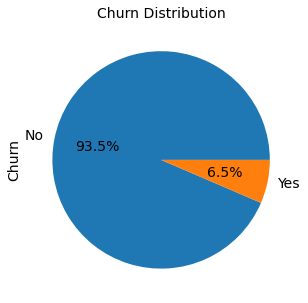

In [65]:
#Churn Distribution
ax = (final_df['churn'].value_counts()*100.0 /len(final_df)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 14 )                                                                           

ax.set_ylabel('Churn',fontsize = 14)
ax.set_title('Churn Distribution', fontsize = 14)

**Univariate analysis**

In [66]:
#function for univariate analysis
def univariate_analysis(columns_list):
    plt.figure(figsize = (25,15))
    i = 1
    for col in columns_list:
        plt.subplot(len(columns_list),1,i)
        sns.boxplot(final_df[col])
        i = i+1
    plt.show()

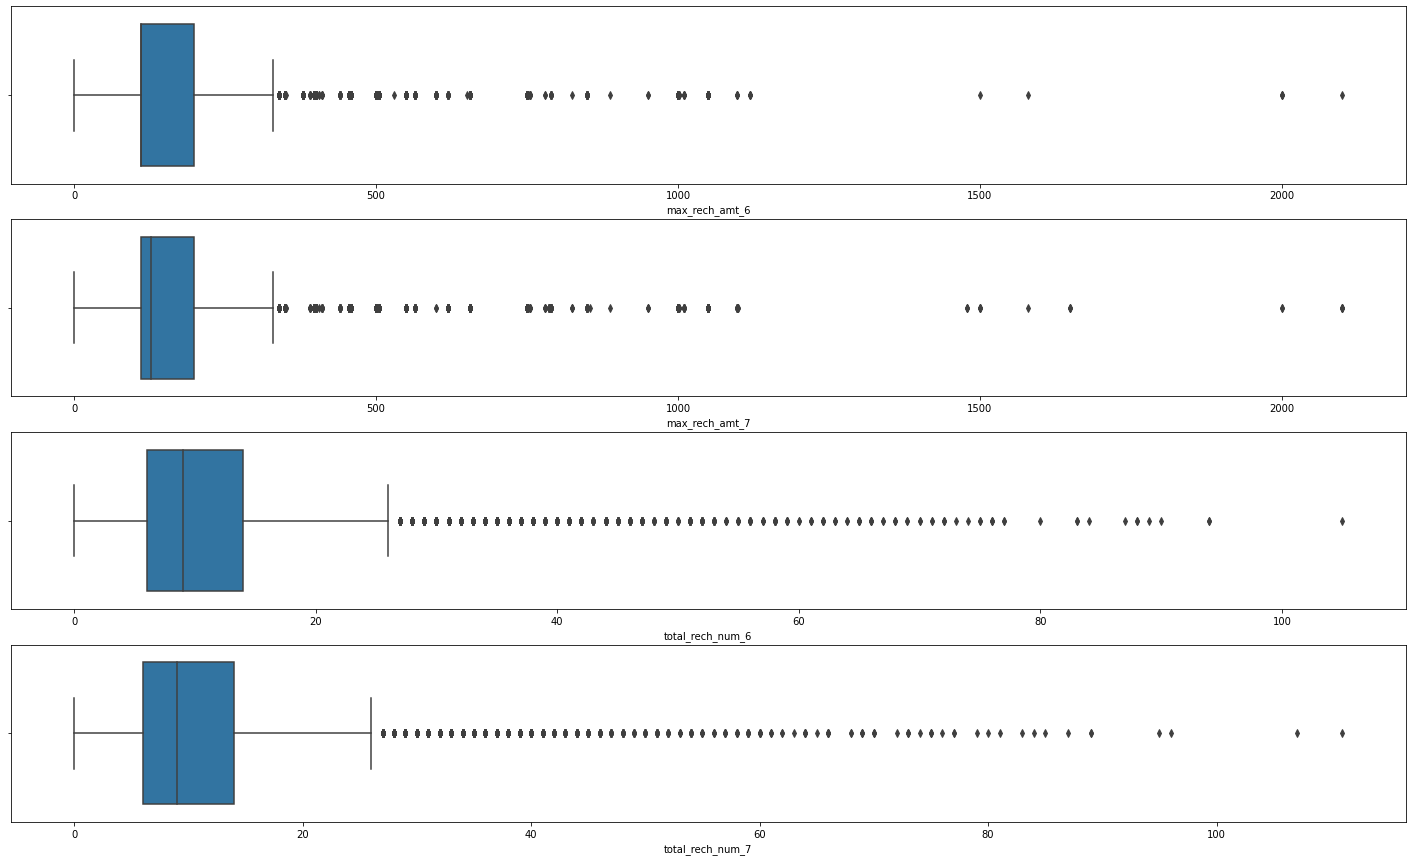

In [67]:
univarate_columns_list=['max_rech_amt_6','max_rech_amt_7', 'total_rech_num_6','total_rech_num_7',]
univariate_analysis(univarate_columns_list)

Text(0.5, 1.0, 'Customers by their tenure')

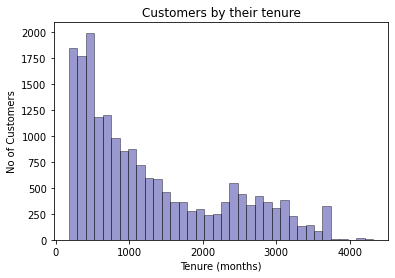

In [68]:
ax = sns.distplot(final_df['aon'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('No of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Customers by their tenure')

**Bivariate Analysis**

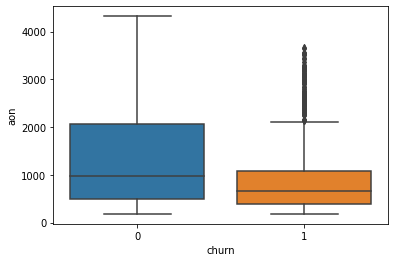

In [69]:
# Churn vs tenure
sns.boxplot(x = final_df.churn, y = final_df.aon)
plt.show()

In [70]:
def bivariate_analysis(final_df,columns_list):
    plt.figure(figsize = (20,18))
    i = 1
    for col in columns_list:
        plt.subplot(len(columns_list)//2,2,i)
        sns.barplot(x='churn', y=col, data=final_df)
        i = i+1
    plt.show()

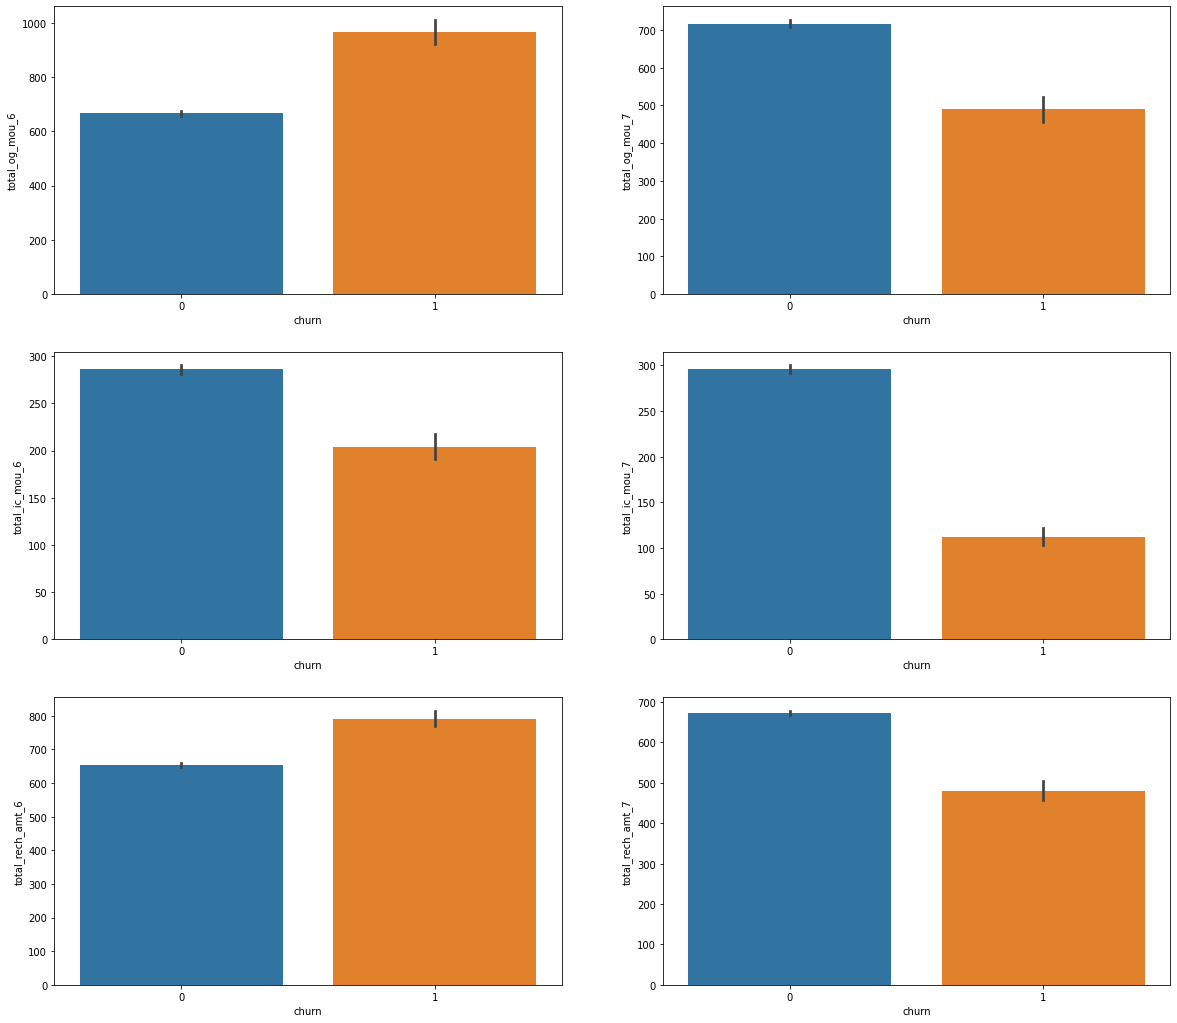

In [71]:
bivarate_columns_list=['total_og_mou_6','total_og_mou_7','total_ic_mou_6','total_ic_mou_7','total_rech_amt_6','total_rech_amt_7',]
bivariate_analysis(final_df,bivarate_columns_list)

**Handling the imbalance in the data**
*  There are several ways to handle the imbalance in the data such as down-sampling the majority class or upsampling the minority class
*  I chose the latter because the first one might lead to serious loss of information which inturn may effect the predictions

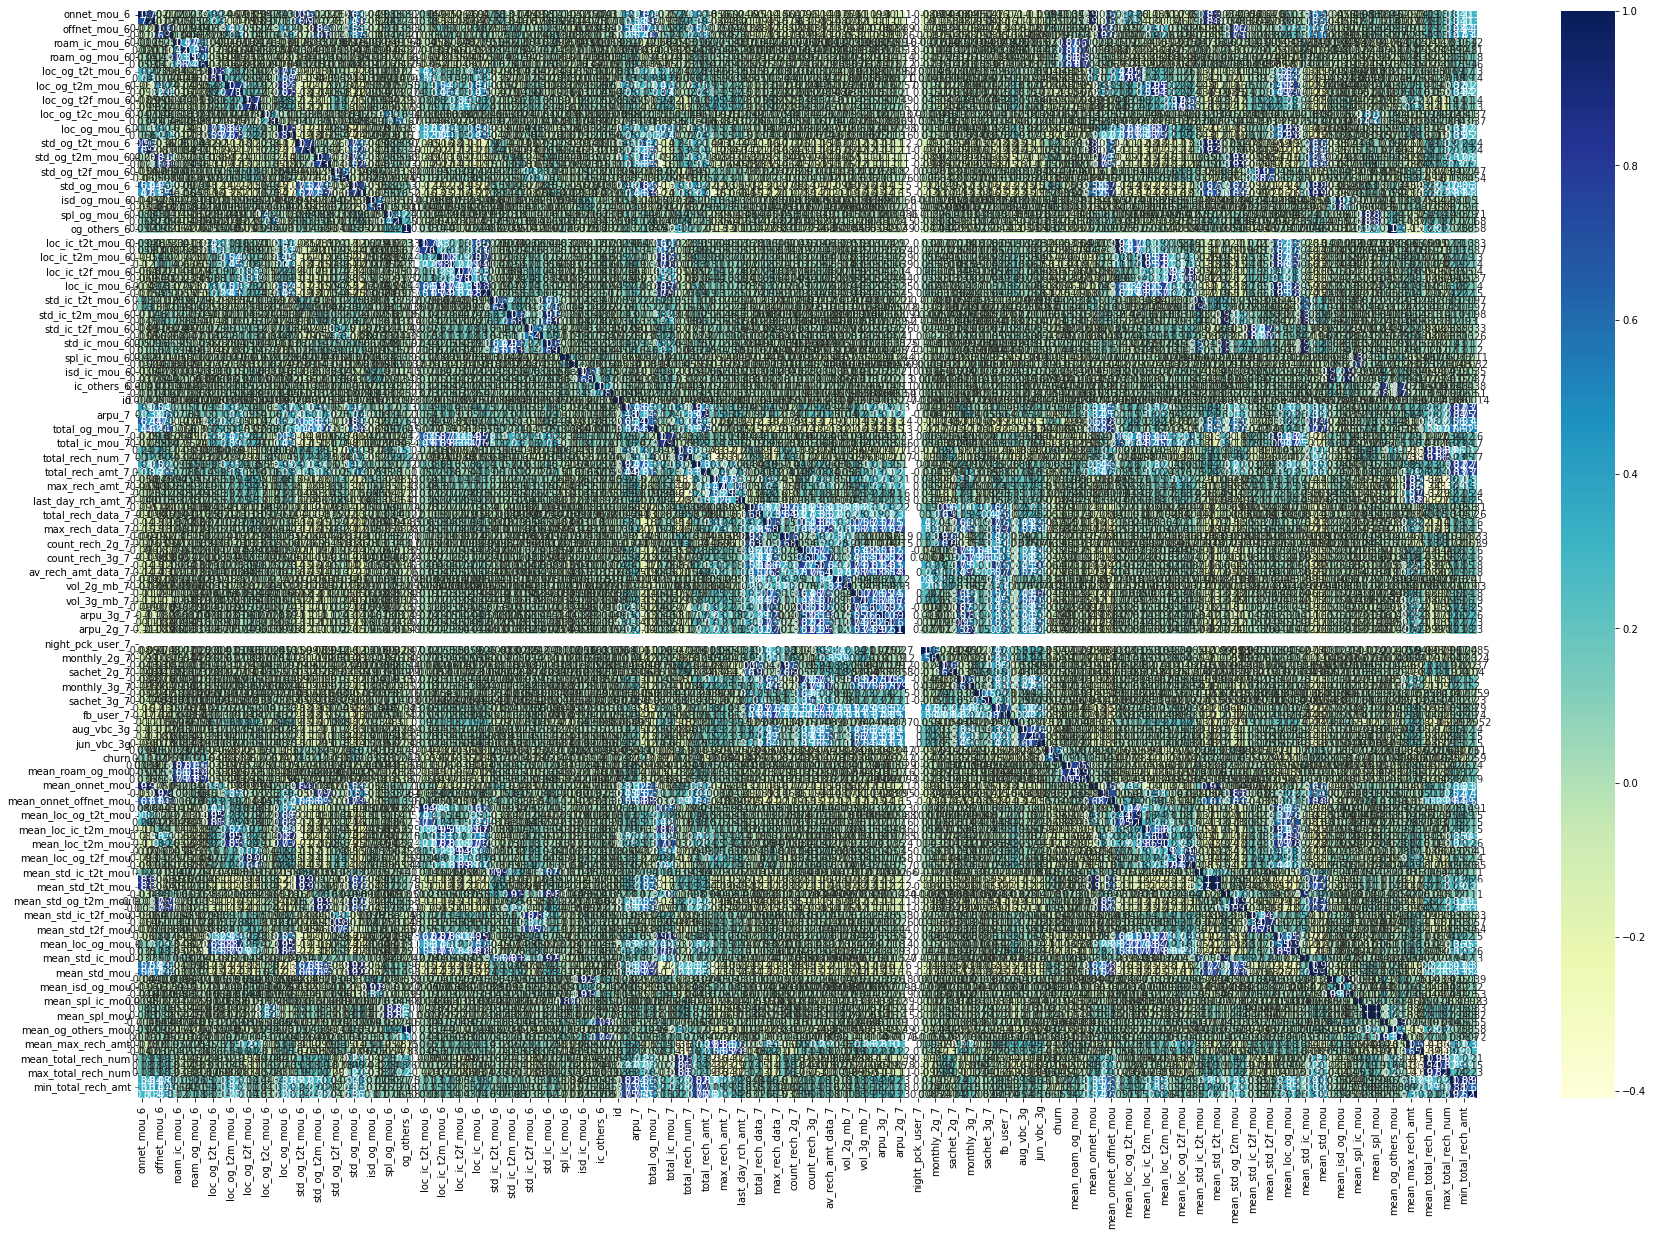

In [72]:
# Here we plotting correlations using heatmap
plt.figure(figsize=(30,20))
sns.heatmap(final_df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [73]:
from sklearn.utils import resample

In [74]:
final_df.churn.value_counts()

0    17734
1     1226
Name: churn, dtype: int64

In [76]:
df_majority = final_df[final_df.churn==0]
df_minority = final_df[final_df.churn==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=17734,    # to match majority class
                                 random_state=42) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.churn.value_counts()

0    17734
1    17734
Name: churn, dtype: int64

PCA - Principal Component Analysis on the data
Note -
While computng the principal components, we must not include the entire dataset. Model building is all about doing well on the data we haven't seen yet!
So we'll calculate the PCs using the train data, and apply them later on the test data

In [77]:
df_telcom_pca2 = final_df.copy()

In [78]:
df_telcom_pca2.head()

onnet_mou_6  onnet_mou_7  offnet_mou_6  offnet_mou_7  roam_ic_mou_6  \
0       244.46       108.31        571.98        727.91            0.0   
1        10.43        24.99        317.11        341.79            0.0   
2       859.53       372.71        293.46        450.11            0.0   
3        93.18        38.29        531.19        507.76            0.0   
4       193.71       124.53        423.21        184.88            0.0   

   roam_ic_mou_7  roam_og_mou_6  roam_og_mou_7  loc_og_t2t_mou_6  \
0            0.0            0.0            0.0              0.00   
1            0.0            0.0            0.0             10.43   
2            0.0            0.0            0.0            859.53   
3            0.0            0.0            0.0             93.18   
4            0.0            0.0            0.0             49.81   

   loc_og_t2t_mou_7  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2f_mou_6  \
0              7.86             44.01             13.93              0.00   
1             24.99            313.76            330.88              3.26   
2            372.71             79.79            424.63             11.58   
3             38.29            159.29            219.44              0.00   
4             75.01            164.39            115.48              3.31   

   loc_og_t2f_mou_7  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_mou_6  \
0              0.00               0.0               0.0         44.01   
1             10.91               0.0               0.0        327.46   
2             25.43               0.0               0.0        950.91   
3              0.00               0.0               0.0        252.48   
4              0.00               0.0               0.0        217.53   

   loc_og_mou_7  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2m_mou_6  \
0         21.79            244.46            100.44            527.96   
1        366.79              0.00              0.00              0.00   
2        822.78              0.00              0.00            202.08   
3        257.74              0.00              0.00            371.89   
4        190.49            143.89             49.51            255.49   

   std_og_t2m_mou_7  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_mou_6  \
0            713.98               0.0               0.0        772.43   
1              0.00               0.0               0.0          0.00   
2              0.00               0.0               0.0        202.08   
3            288.31               0.0               0.0        371.89   
4             64.99               0.0               0.0        399.39   

   std_og_mou_7  isd_og_mou_6  isd_og_mou_7  spl_og_mou_6  spl_og_mou_7  \
0        814.43           0.0           0.0          0.00          0.00   
1          0.00           0.0           0.0          0.08          0.00   
2          0.00           0.0           0.0          0.00          0.05   
3        288.31           0.0           0.0          0.00          0.00   
4        114.51           0.0           0.0          0.00          4.40   

   og_others_6  og_others_7  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  \
0          0.0          0.0              0.00              0.53   
1          0.1          0.0             13.86             20.18   
2          0.0          0.0            233.28            117.63   
3          0.0          0.0             52.49             37.84   
4          0.0          0.0            113.76            114.98   

   loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  \
0             26.93             25.68              0.00              0.00   
1            219.31            754.24              0.00              1.93   
2            123.78            278.49             34.31             52.08   
3            170.61            106.71              0.00              1.53   
4            230.24            180.11             26.71              2.01   

   loc_ic_mou_6  loc_ic_mou_7  std_ic_t2t_mou_6  std

In [79]:
df_telcom_pca2.shape

(18960, 152)

**Scaling the data with StandardScaler**

In [81]:
Y = df_telcom_pca2["churn"]
X = df_telcom_pca2.drop(["churn"],axis=1)

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [83]:
scaler = StandardScaler()
X_col = X.columns
X_scaled = scaler.fit_transform(X)
X_scale_final = pd.DataFrame(X_scaled, columns=X_col)

In [84]:
X_scale_final.shape

(18960, 151)

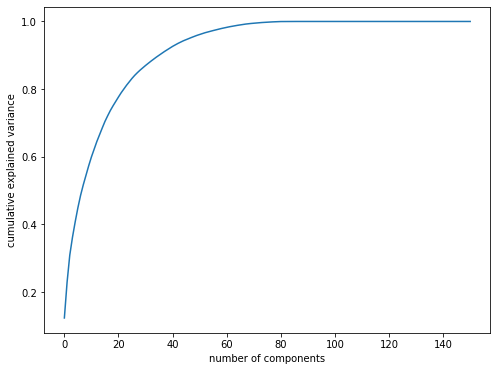

In [85]:
pca = PCA(svd_solver='randomized', random_state=101)
pca.fit(X_scale_final)
fig = plt.figure(figsize = (8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [86]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([12.37, 22.9 , 30.94, 36.23, 40.77, 44.95, 48.63, 51.75, 54.61,
       57.37, 59.95, 62.26, 64.5 , 66.53, 68.51, 70.44, 72.1 , 73.68,
       75.07, 76.38, 77.67, 78.92, 80.06, 81.15, 82.18, 83.16, 84.06,
       84.86, 85.61, 86.3 , 86.97, 87.62, 88.24, 88.85, 89.44, 90.  ,
       90.56, 91.1 , 91.62, 92.13, 92.62, 93.07, 93.5 , 93.9 , 94.28,
       94.61, 94.94, 95.26, 95.57, 95.87, 96.14, 96.41, 96.66, 96.88,
       97.09, 97.3 , 97.5 , 97.7 , 97.89, 98.07, 98.24, 98.4 , 98.55,
       98.7 , 98.83, 98.96, 99.09, 99.21, 99.31, 99.39, 99.47, 99.54,
       99.61, 99.67, 99.73, 99.78, 99.83, 99.87, 99.91, 99.94, 99.96,
       99.97, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98,
       99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98,
       99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98,
       99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98,
       99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98,
       99.98, 99.98,

In [87]:
col = list(X_scale_final.columns)
df_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':col})
df_pca.head(10)

PC1       PC2       PC3           Feature
0 -0.084095  0.114016  0.041617       onnet_mou_6
1 -0.088758  0.111011  0.045297       onnet_mou_7
2 -0.032621  0.158870  0.028111      offnet_mou_6
3 -0.040932  0.153393  0.033354      offnet_mou_7
4 -0.003226 -0.003107  0.024001     roam_ic_mou_6
5 -0.004522 -0.006018  0.023570     roam_ic_mou_7
6 -0.018997  0.002196  0.029926     roam_og_mou_6
7 -0.019649 -0.000009  0.029779     roam_og_mou_7
8  0.072145  0.091311 -0.052262  loc_og_t2t_mou_6
9  0.070032  0.092037 -0.049079  loc_og_t2t_mou_7

In [88]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scale_final,Y, train_size=0.7,test_size=0.3,random_state=100)

In [89]:
X_train.shape

(13272, 151)

In [90]:
from imblearn.over_sampling import SMOTE

**Class Imbalance**

In [91]:
smote = SMOTE(random_state=101)
x_train_sm,y_train_sm = smote.fit_resample(X_train,y_train)

**Pricnipal Component Analysis**

In [93]:
from sklearn.decomposition import IncrementalPCA

In [94]:
# Applying PCA : Pricnipal Component Analysis
pca = IncrementalPCA(n_components=60)    
x_train_pca = pca.fit_transform(x_train_sm) # fit and transform the training dataset
x_test_pca = pca.transform(X_test)

In [95]:
# fit and transform the whole dataset
X_pca = pca.fit_transform(X)

In [98]:
#dataset after PCA
x_train_pca.shape

(24840, 60)

**Logistic Regression with PCA**

In [99]:
# List to store the model scores
model_score_list = []

In [101]:
from sklearn import metrics
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier

In [102]:
lr = LogisticRegression()
model = lr.fit(x_train_pca,y_train_sm) ## Feeding the PCA data to Logistic Regression Model

#Making prediction on the test data
pred_probs_test = model.predict_proba(x_test_pca)[:,1]

print("Accurancy : "+"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test)))

Accurancy : 0.93


In [104]:
from sklearn.metrics import recall_score,precision_score,roc_auc_score,f1_score,accuracy_score,confusion_matrix

In [105]:
# fit the pca training data
model.fit(x_train_pca, y_train_sm)

# predict the testing pca data
Y_pred = model.predict(x_test_pca)


# Model evaluation
acc_score = round(accuracy_score(y_test, Y_pred)*100,2)
print('Accuracy Score : ',acc_score)

# ROC AUC score
roc_score = round(roc_auc_score(y_test, Y_pred)*100,2)
print('ROC AUC score : ',roc_score)

# Precision score
prec_score = round(precision_score(y_test, Y_pred)*100,2)
print('Precision score : ', prec_score)

# Recall score
rec_score = round(recall_score(y_test, Y_pred)*100,2)
print('Recall score : ', rec_score)

model_score_list.append({'model_name':'LogisticRegression', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

Accuracy Score :  90.52
ROC AUC score :  86.48
Precision score :  39.38
Recall score :  81.82


**Decision Tree Model Regression**

In [107]:
from sklearn.tree import DecisionTreeClassifier

In [108]:
# initialize the Decision Tree
model = DecisionTreeClassifier(class_weight='balanced', random_state=101)
# fit the pca training data
model.fit(x_train_pca, y_train_sm)
# predict the pca testing data
Y_pred = model.predict(x_test_pca)

# Model evaluation
acc_score = round(accuracy_score(y_test, Y_pred)*100,2)
print('Accuracy Score : ',acc_score)

# ROC AUC score
roc_score = round(roc_auc_score(y_test, Y_pred)*100,2)
print('ROC AUC score : ',roc_score)

# Precision score
prec_score = round(precision_score(y_test, Y_pred)*100,2)
print('Precision score : ', prec_score)

# Recall score
rec_score = round(recall_score(y_test, Y_pred)*100,2)
print('Recall score : ', rec_score)

model_score_list.append({'model_name':'Tree Regression', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

Accuracy Score :  88.26
ROC AUC score :  72.34
Precision score :  28.94
Recall score :  54.01


**RandomForest**

In [109]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier

In [110]:
# initialize the randomforest
model = RandomForestClassifier(class_weight='balanced', random_state=101)
# fit the pca training data
model.fit(x_train_pca, y_train_sm)
# predict the pca testing data
Y_pred = model.predict(x_test_pca)

# Model evaluation
acc_score = round(accuracy_score(y_test, Y_pred)*100,2)
print('Accuracy Score : ',acc_score)

# ROC AUC score
roc_score = round(roc_auc_score(y_test, Y_pred)*100,2)
print('ROC AUC score : ',roc_score)

# Precision score
prec_score = round(precision_score(y_test, Y_pred)*100,2)
print('Precision score : ', prec_score)

# Recall score
rec_score = round(recall_score(y_test, Y_pred)*100,2)
print('Recall score : ', rec_score)

model_score_list.append({'model_name':'Random Forest', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

Accuracy Score :  93.64
ROC AUC score :  72.86
Precision score :  51.69
Recall score :  48.93


**XGBoost**

In [111]:
from xgboost import XGBClassifier

In [112]:
# Initialize the XGBoost
model = XGBClassifier(random_state=101)
# fit the pca training data
model.fit(x_train_pca, y_train_sm)
# predict the pca testing data
Y_pred = model.predict(x_test_pca)

# Model evaluation
acc_score = round(accuracy_score(y_test, Y_pred)*100,2)
print('Accuracy Score : ',acc_score)

# ROC AUC score
roc_score = round(roc_auc_score(y_test, Y_pred)*100,2)
print('ROC AUC score : ',roc_score)

# Precision score
prec_score = round(precision_score(y_test, Y_pred)*100,2)
print('Precision score : ', prec_score)

# Recall score
rec_score = round(recall_score(y_test, Y_pred)*100,2)
print('Recall score : ', rec_score)

model_score_list.append({'model_name':'XGBoost', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

Accuracy Score :  90.63
ROC AUC score :  83.55
Precision score :  39.0
Recall score :  75.4


**Model List View by Different Scores**

In [131]:
# convert the model scores to dataframe
model_score_df = pd.DataFrame(model_score_list,columns=['model_name', 'acc_score', 'roc_score','precision_score','recall_score'])

# Order by highest recall score and roc_auc_score
model_score_df.sort_values(['recall_score','roc_score'], ascending=False)

model_name  acc_score  roc_score  precision_score  recall_score
0  LogisticRegression      90.52      86.48            39.38         81.82
3             XGBoost      90.63      83.55            39.00         75.40
1     Tree Regression      88.26      72.34            28.94         54.01
2       Random Forest      93.64      72.86            51.69         48.93